In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import Counter
import numpy as np
from scipy.stats import ttest_ind

In [2]:
sns.set_context("talk")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size']=14

In [3]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

# Residue Depth

## VHH

In [4]:
vhh_data_depth = pickle.load(open("NR_H_Free_Martin_depth.pkl",'rb'))
vh_data_depth = pickle.load(open("NR_LH_Free_Martin_depth.pkl",'rb'))

In [5]:
count_depth_vhh=dict()
for i in vhh_data_depth:
    x,y = i[1]
    for _x,_y in zip(x,y):
        if _x in count_depth_vhh.keys():
            count_depth_vhh[_x].append(_y)
        else:
            count_depth_vhh[_x] = [_y]
            
count_depth_vh=dict()
for i in vh_data_depth:
    x,y = i[1]
    
    for _x,_y in zip(x,y):
        if _y>12:
            continue
        if _x in count_depth_vh.keys():
            count_depth_vh[_x].append(_y)
        else:
            count_depth_vh[_x] = [_y]

In [6]:
# deleted_keys =set()
# for k,v in count_depth_vh.items():
#     if len(v)*100/len(vh_data_depth) < 1 and k[-1].isalpha():
#         print(f"remove:{k}")
#         deleted_keys.add(k)
# for k in deleted_keys:
#     del count_depth_vh[k]
# deleted_keys =set()
# for k,v in count_depth_vhh.items():
#     if len(v)*100/len(vhh_data_depth) < 1 and k[-1].isalpha():
#         print(f"remove:{k}")
#         deleted_keys.add(k)
shared_keys = set(count_depth_vh.keys())&set(count_depth_vhh.keys())
for k in set(count_depth_vh.keys())-shared_keys:
    del count_depth_vh[k]
for k in set(count_depth_vhh.keys())-shared_keys:
    del count_depth_vhh[k]



for i in range(1,114):
    if not str(i) in shared_keys:
        count_depth_vh[str(i)] =0
        count_depth_vhh[str(i)] =0
sorted_result_vh = sorted([[pos,hits] for pos,hits in count_depth_vh.items()],key=lambda x: natural_keys(x[0]))
sorted_result_vhh = sorted([[pos,hits] for pos,hits in count_depth_vhh.items()],key=lambda x: natural_keys(x[0]))


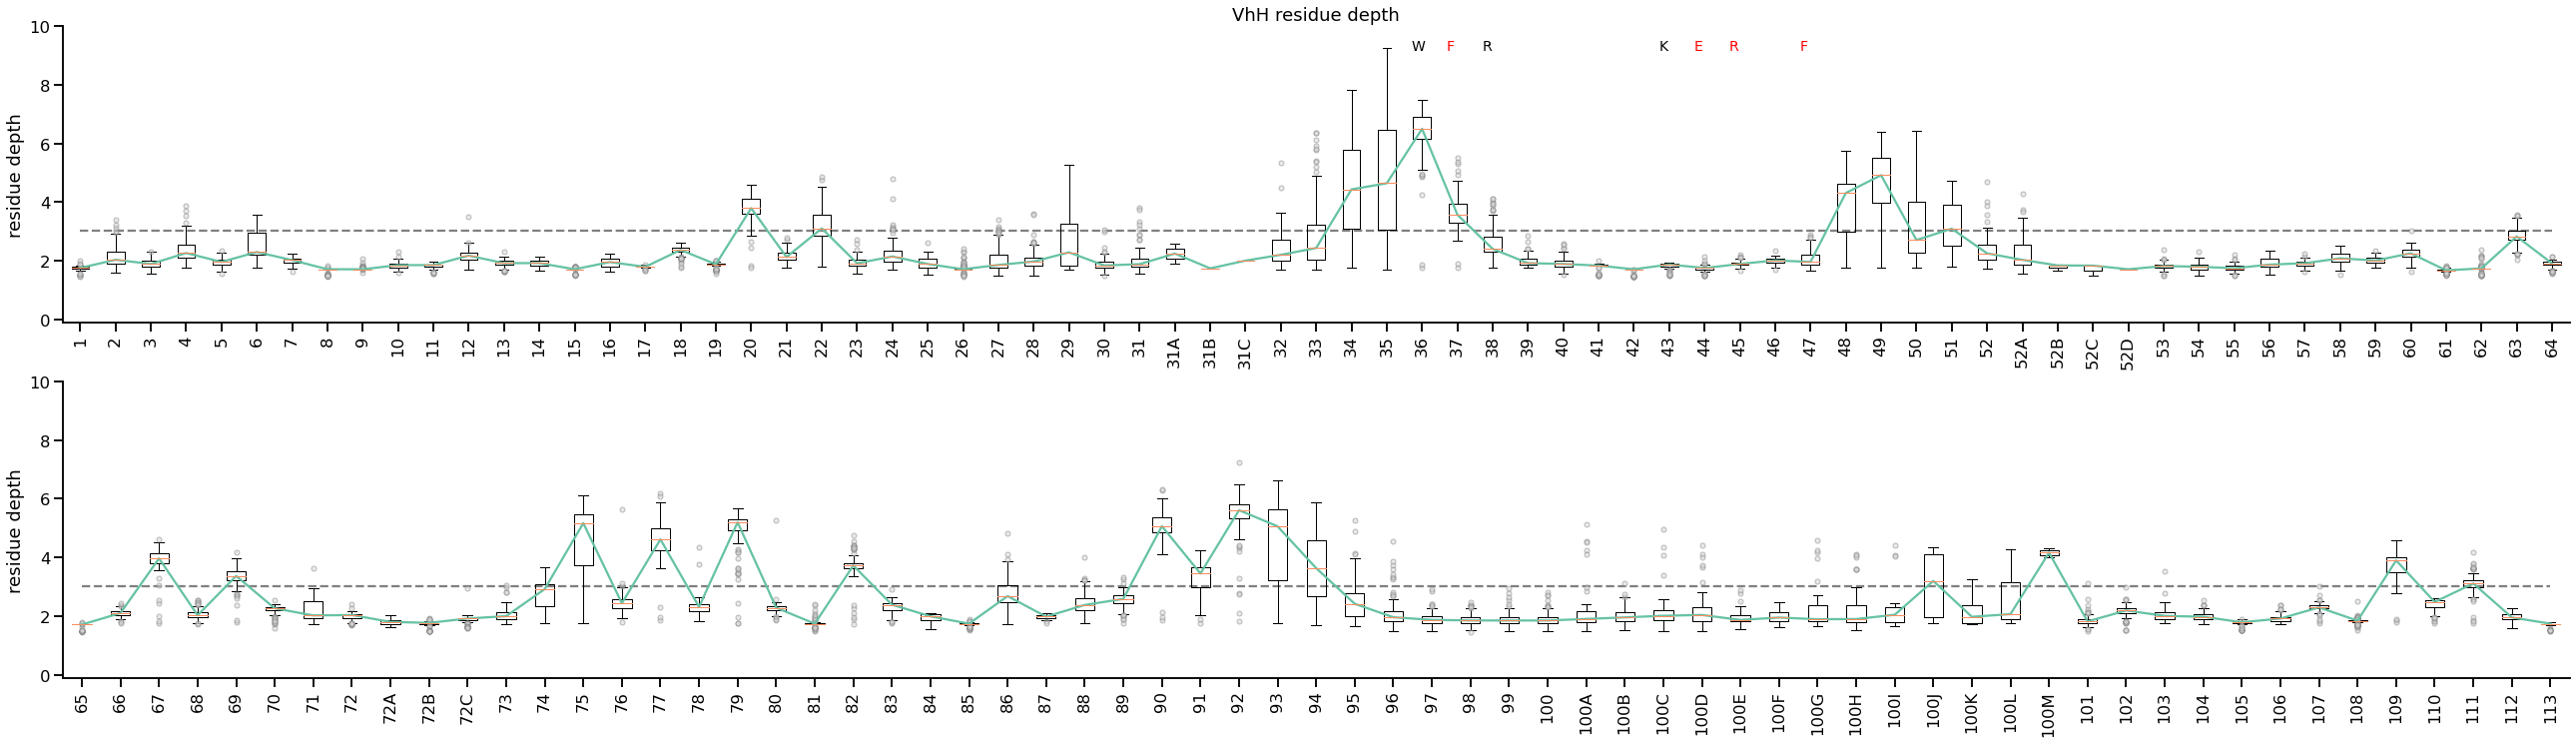

In [12]:
x = [i[0] for i in sorted_result_vhh]
y = [i[1] for i in sorted_result_vhh]
fig = plt.figure(figsize=(45,12))

break_point = x.index("65")

x1 = x[:break_point]
y1 = y[:break_point]
y1_median = [np.median(_y) for _y in y1]

x2 = x[break_point:]
y2 = y[break_point:]
y2_median = [np.median(_y) for _y in y2]

AbM_definition=[x.index("26")+1,x.index("36")+1,x.index("50")+1,x.index("59")+1,x.index("95")+1,x.index("103")+1]
Contact_definition=[x.index("30")+1,x.index("36")+1,x.index("47")+1,x.index("59")+1,x.index("93")+1,x.index("102")+1]


flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=5, linestyle='none',linewidth=0,markeredgecolor='grey',alpha=0.5)


ax1 = fig.add_subplot(211)
ax1.boxplot(y1,flierprops=flierprops)
ax1.plot(np.arange(len(y1_median))+1,y1_median)
ax1.set_ylabel("residue depth")

#ax1.text(AbM_definition[0]-3,9,"AbM",color='darkblue')
#ax1.text(Contact_definition[0]-3,10,"Contact",color='darkred')
ax1.hlines(xmin=[1],
           xmax=[break_point],
           y=[3.03],linestyle='dashed',colors=['gray'])
#ax1.hlines(xmin=[1,AbM_definition[0],Contact_definition[0],AbM_definition[2],Contact_definition[2]],
#           xmax=[70,AbM_definition[1],Contact_definition[1],AbM_definition[3],Contact_definition[3]],
#           y=[3.03,9,10,9,10],linestyle='dashed',
#           colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
ax1.set_ylim(ymin=-0.1,ymax=10)
ax1.set_xticklabels(x1,rotation=90)
W36 = x.index("36")+1
F37 = x.index("37")+1
R38 = x.index("38")+1
K43 = x.index("43")+1
E44 = x.index("44")+1
R45 = x.index("45")+1
F47 = x.index("47")+1
ax1.text(W36-0.3,9.2,"W")
ax1.text(F37-0.3,9.2,"F",color='red')

ax1.text(R38-0.3,9.2,"R")
ax1.text(K43-0.3,9.2,"K")
ax1.text(E44-0.3,9.2,"E",color='red')
ax1.text(R45-0.3,9.2,"R",color='red')
ax1.text(F47-0.3,9.2,"F",color='red')
ax1.set_title("VhH residue depth")
sns.despine()

ax2 = fig.add_subplot(212)
ax2.boxplot(y2,flierprops=flierprops)
ax2.plot(np.arange(len(y2_median))+1,y2_median)
ax2.set_ylabel("residue depth")
ax2.hlines(xmin=[1],
           xmax=[len(x)-break_point],
           y=[3.03],linestyle='dashed',colors=['gray'])
#ax2.hlines(xmin=[1,AbM_definition[4]-break_point,Contact_definition[4]-break_point],
#           xmax=[70,AbM_definition[5]-break_point,Contact_definition[5]-break_point],
#           y=[3.03,9,10],linestyle='dashed',
#          colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
#ax2.set_xlim(xmin=break_point,xmax=152)
#ax2.text(AbM_definition[4]-break_point-3,9,"AbM",color='darkblue')
#ax2.text(Contact_definition[4]-break_point-3,10,"Contact",color='darkred')

ax2.set_ylim(ymin=-0.1,ymax=10)
ax2.set_xticklabels(x2,rotation=90)

sns.despine()

#plt.savefig("Residue_depth_Nbs.svg")


In [14]:
F37+1

41

{'whiskers': [<matplotlib.lines.Line2D at 0x7f884ce73470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f884ce739e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f884ce635f8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f884ce73f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f884ce95278>,
 'means': []}

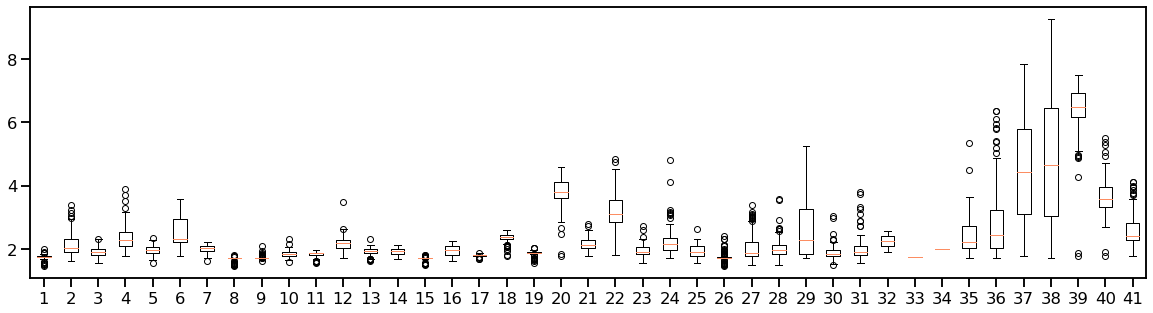

In [17]:
plt.figure(figsize=(20,5))
plt.boxplot(y[:41])

In [9]:
len(y[104])

102

In [10]:
np.std([(np.array(i)>3.03).astype(int).sum() for i in y])/102

0.3070010769057057

## Percentage of buried residues

In [23]:
buried_FR_residue_data = []
for item in vhh_data_depth:
    pdb = item[0]
    resnum = np.array(item[1][0])
    depth = np.array(item[1][1])
    buried_aa = resnum[np.where(depth>3.03)]
    buried_aa_num = list(set([int("".join([j for j in i if j.isdigit()])) for i in buried_aa]))
    buired_fr_aa_num =[]
    #for aa_num in buried_aa_num:
    #    if aa_num >25 and aa_num<=35:
    #        continue
    #    if aa_num >49 and aa_num<=58:
    #        continue
    #    if aa_num > 94 and aa_num<=102:
    #        continue
    #buired_fr_aa_num.append(aa_num)
    buried_FR_residue_data.append([pdb,buried_aa_num])

In [34]:
len(buried_FR_residue_data[0][1])

26

In [32]:
len(vhh_data_depth[0][1][0])

126

In [7]:
y = [i[1] for i in sorted_result_vhh]

In [13]:
len(x)

136

In [36]:
percentage_mean = []
percentage_std = []


for i in np.arange(2500,3500)/1000:
    percentage_mean.append((np.array([np.mean(i) for i in y])>i).astype(int).mean())
    percentage_std.append((np.array([np.mean(i) for i in y])>i).astype(int).std())

In [98]:
102*(0.25)

25.5

In [99]:
len(percentage_mean)

2500

In [110]:
percentage_mean[-1]

0.1323529411764706

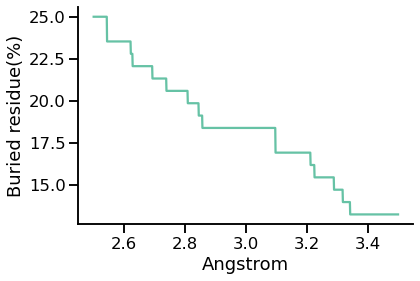

In [37]:
plt.plot(np.arange(2500,3500)/1000,[100*i for i in percentage_mean])
plt.ylabel("Buried residue(%)")
plt.xlabel("Angstrom")
sns.despine()
plt.savefig("benchmark_cutoff.pdf",format='pdf')

## IgG

In [20]:
x.index("37")

39

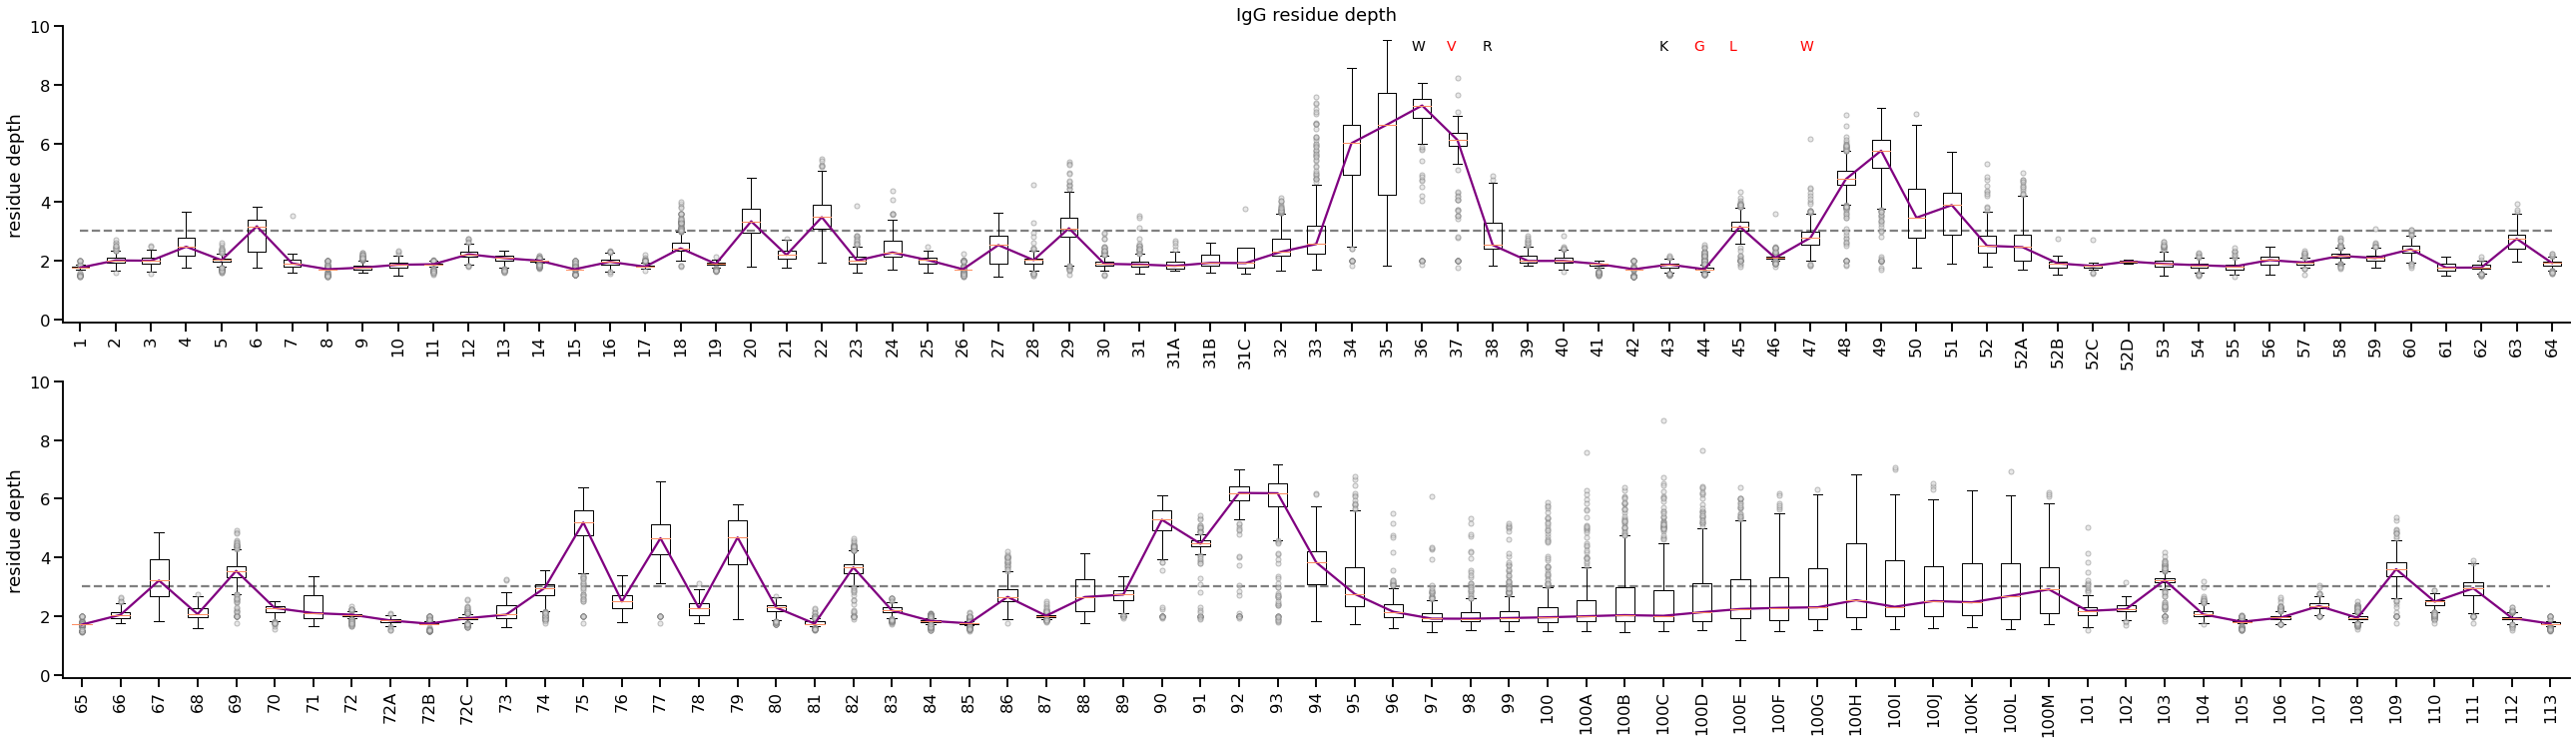

In [40]:
x_vh = [i[0] for i in sorted_result_vh]
y_vh = [i[1] for i in sorted_result_vh]
fig = plt.figure(figsize=(45,12))

break_point = x_vh.index("65")

x1 = x_vh[:break_point]
y1 = y_vh[:break_point]
y1_median = [np.median(_y) for _y in y1]

x2 = x_vh[break_point:]
y2 = y_vh[break_point:]
y2_median = [np.median(_y) for _y in y2]

#AbM_definition=[x.index("26")+1,x.index("36")+1,x.index("50")+1,x.index("59")+1,x.index("95")+1,x.index("103")+1]
#Contact_definition=[x.index("30")+1,x.index("36")+1,x.index("47")+1,x.index("59")+1,x.index("93")+1,x.index("102")+1]


flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=5, linestyle='none',linewidth=0,markeredgecolor='grey',alpha=0.5)


ax1 = fig.add_subplot(211)
ax1.boxplot(y1,flierprops=flierprops)
ax1.plot(np.arange(len(y1_median))+1,y1_median,color='purple')
ax1.set_ylabel("residue depth")

#ax1.text(AbM_definition[0]-3,9,"AbM",color='darkblue')
#ax1.text(Contact_definition[0]-3,10,"Contact",color='darkred')

ax1.hlines(xmin=[1],
           xmax=[break_point],
           y=[3.03],linestyle='dashed',colors=['gray'])
# ax1.hlines(xmin=[1,AbM_definition[0],Contact_definition[0],AbM_definition[2],Contact_definition[2]],
#            xmax=[70,AbM_definition[1],Contact_definition[1],AbM_definition[3],Contact_definition[3]],
#            y=[3.03,9,10,9,10],linestyle='dashed',
#            colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
ax1.set_ylim(ymin=-0.1,ymax=10)
ax1.set_xticklabels(x1,rotation=90)
W36 = x.index("36")+1
V37 = x.index("37")+1
R38 = x.index("38")+1
K43 = x.index("43")+1
G44 = x.index("44")+1
L45 = x.index("45")+1
W47 = x.index("47")+1
ax1.text(W36-0.3,9.2,"W")
ax1.text(V37-0.3,9.2,"V",color='red')
ax1.text(R38-0.3,9.2,"R")
ax1.text(K43-0.3,9.2,"K")
ax1.text(G44-0.3,9.2,"G",color='red')
ax1.text(L45-0.3,9.2,"L",color='red')
ax1.text(W47-0.3,9.2,"W",color='red')

ax1.set_title("IgG residue depth")
sns.despine()

ax2 = fig.add_subplot(212)
ax2.boxplot(y2,flierprops=flierprops)
ax2.plot(np.arange(len(y2_median))+1,y2_median,color='purple')
ax2.set_ylabel("residue depth")
ax2.hlines(xmin=[1],
           xmax=[len(x)-break_point],
           y=[3.03],linestyle='dashed',colors=['gray'])

# ax2.hlines(xmin=[1,AbM_definition[4]-break_point,Contact_definition[4]-break_point],
#            xmax=[70,AbM_definition[5]-break_point,Contact_definition[5]-break_point],
#            y=[3.03,9,10],linestyle='dashed',
#           colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
# #ax2.set_xlim(xmin=break_point,xmax=152)
# ax2.text(AbM_definition[4]-break_point-3,9,"AbM",color='darkblue')
# ax2.text(Contact_definition[4]-break_point-3,10,"Contact",color='darkred')

ax2.set_ylim(ymin=-0.1,ymax=10)
ax2.set_xticklabels(x2,rotation=90)

sns.despine()
#plt.savefig("Residue_depth_HumanAbs.svg")




In [19]:
len(y)

136

In [20]:
len(y_vh)

136

In [23]:
ttest_ind(y[0],y_vh[0])

Ttest_indResult(statistic=-1.6516805488435453, pvalue=0.09940252127634154)

In [41]:
len(y)

136

In [43]:
len(y_vh)

136

In [46]:
significant = []
for aa_num,i,j in zip(x,y,y_vh):
    pstat,pval = ttest_ind(i,j)
    aa_num = int("".join([i for i in aa_num if i.isdigit()]))
    if aa_num >25 and aa_num<=35:
        continue
    if aa_num >49 and aa_num<=58:
        continue
    if aa_num > 94 and aa_num<=102:
        continue
    significant.append([aa_num,round(pval,6)])

/Users/zhesang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/zhesang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
xxx = np.array(significant).T[0]
ppp = np.array(significant).T[1]

(0.0, 0.06)

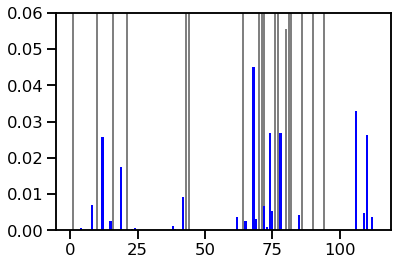

In [60]:
plt.bar(xxx,ppp,color='gray')
plt.bar(xxx[ppp<0.05],ppp[ppp<0.05],color='blue')
plt.ylim(ymax=0.06)

In [61]:
len(xxx[ppp<0.05])

71

In [62]:
len(xxx[ppp>=0.05])

18

In [37]:
significant

[1, 10, 16, 21, 43, 44, 64, 70, 71, 72, 76, 77, 80, 81, 82, 86, 90, 94]

In [16]:
100-100*(np.array([np.mean(i) for i in y])>3.03).astype(int).mean()

77.94117647058823

In [17]:
100*(np.array([np.mean(i) for i in y])>3.03).astype(int).std()

41.464329940799075

In [54]:
len(y[100])

421

In [55]:
np.std([(np.array(i)>3.03).astype(int).sum() for i in y])/421

0.33085359344394905

# Relative solvent accessible area

## VhH

In [ ]:
vhh_data_rsa = pickle.load(open("NR_H_Protein_Martin_rsa.pkl",'rb'))

In [ ]:
count_rsa_vhh=dict()
for i in vhh_data_rsa:
    x,y = i
    
    for _x,_y in zip(x,y):
        if _x in count_rsa_vhh.keys():
            count_rsa_vhh[_x].append(_y)
        else:
            count_rsa_vhh[_x] = [_y]

deleted_keys =set()
for k,v in count_rsa_vhh.items():
    if len(v)*100/len(vhh_data_rsa) < 1 and k[-1].isalpha():
        print(f"remove:{k}")
        deleted_keys.add(k)
for k in deleted_keys:
    del count_rsa_vhh[k]
for i in range(1,114):
    if not str(i) in count_rsa_vhh.keys():
        count_rsa_vhh[str(i)] =0
sorted_result = sorted([[pos,hits] for pos,hits in count_rsa_vhh.items()],key=lambda x: natural_keys(x[0]))

In [ ]:
x = [i[0] for i in sorted_result]
y = [i[1] for i in sorted_result]
fig = plt.figure(figsize=(35,12))

break_point = x.index("70")

x1 = x[:break_point]
y1 = y[:break_point]
y1_median = [np.median(_y) for _y in y1]

x2 = x[break_point:]
y2 = y[break_point:]
y2_median = [np.median(_y) for _y in y2]

AbM_definition=[x.index("26")+1,x.index("36")+1,x.index("50")+1,x.index("59")+1,x.index("95")+1,x.index("103")+1]
Contact_definition=[x.index("30")+1,x.index("36")+1,x.index("47")+1,x.index("59")+1,x.index("93")+1,x.index("102")+1]


flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=5, linestyle='none',linewidth=0,markeredgecolor='grey',alpha=0.5)


ax1 = fig.add_subplot(211)
ax1.boxplot(y1,flierprops=flierprops)
ax1.plot(np.arange(len(y1_median))+1,y1_median)
ax1.set_ylabel("residue relative solevent accessible area")

ax1.text(AbM_definition[0]-3,.9,"AbM",color='darkblue')
ax1.text(Contact_definition[0]-3,1,"Contact",color='darkred')

ax1.hlines(xmin=[1,AbM_definition[0],Contact_definition[0],AbM_definition[2],Contact_definition[2]],
           xmax=[70,AbM_definition[1],Contact_definition[1],AbM_definition[3],Contact_definition[3]],
           y=[0.05,.9,1,.9,1],linestyle='dashed',
           colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
ax1.set_ylim(ymin=-0.1,ymax=1)
ax1.set_xticklabels(x1,rotation=90)
W36 = x.index("36")+1
F37 = x.index("37")+1
R38 = x.index("38")+1
K43 = x.index("43")+1
E44 = x.index("44")+1
R45 = x.index("45")+1
F47 = x.index("47")+1
ax1.text(W36-0.3,.92,"W")
ax1.text(F37-0.3,.92,"F",color='red')

ax1.text(R38-0.3,.92,"R")
ax1.text(K43-0.3,.92,"K")
ax1.text(E44-0.3,.92,"E",color='red')
ax1.text(R45-0.3,.92,"R",color='red')
ax1.text(F47-0.3,.92,"F",color='red')
ax1.set_title("VhH relative solevent accessible area")
sns.despine()

ax2 = fig.add_subplot(212)
ax2.boxplot(y2,flierprops=flierprops)
ax2.plot(np.arange(len(y2_median))+1,y2_median)
#ax2.set_ylabel("residue relative solevent accessible area")

ax2.hlines(xmin=[1,AbM_definition[4]-break_point,Contact_definition[4]-break_point],
           xmax=[70,AbM_definition[5]-break_point,Contact_definition[5]-break_point],
           y=[0.05,.9,1],linestyle='dashed',
          colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
#ax2.set_xlim(xmin=break_point,xmax=152)
ax2.text(AbM_definition[4]-break_point-3,.9,"AbM",color='darkblue')
ax2.text(Contact_definition[4]-break_point-3,1,"Contact",color='darkred')

ax2.set_ylim(ymin=-0.1,ymax=1)
ax2.set_xticklabels(x2,rotation=90)

sns.despine()


## IgG

In [ ]:
vh_data_rsa = pickle.load(open("NR_LH_Protein_Martin_rsa.pkl",'rb'))

In [ ]:
count_rsa_vh=dict()
for i in vh_data_rsa:
    x,y = i
    
    for _x,_y in zip(x,y):
        if _x in count_rsa_vh.keys():
            count_rsa_vh[_x].append(_y)
        else:
            count_rsa_vh[_x] = [_y]

deleted_keys =set()
for k,v in count_rsa_vh.items():
    if len(v)*100/len(vh_data_rsa) < 1 and k[-1].isalpha():
        print(f"remove:{k}")
        deleted_keys.add(k)
for k in deleted_keys:
    del count_rsa_vh[k]
for i in range(1,114):
    if not str(i) in count_rsa_vh.keys():
        count_rsa_vh[str(i)] =0
sorted_result = sorted([[pos,hits] for pos,hits in count_rsa_vh.items()],key=lambda x: natural_keys(x[0]))

In [ ]:
x = [i[0] for i in sorted_result]
y = [i[1] for i in sorted_result]
fig = plt.figure(figsize=(35,12))

break_point = x.index("70")

x1 = x[:break_point]
y1 = y[:break_point]
y1_median = [np.median(_y) for _y in y1]

x2 = x[break_point:]
y2 = y[break_point:]
y2_median = [np.median(_y) for _y in y2]

AbM_definition=[x.index("26")+1,x.index("36")+1,x.index("50")+1,x.index("59")+1,x.index("95")+1,x.index("103")+1]
Contact_definition=[x.index("30")+1,x.index("36")+1,x.index("47")+1,x.index("59")+1,x.index("93")+1,x.index("102")+1]


flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=5, linestyle='none',linewidth=0,markeredgecolor='grey',alpha=0.5)


ax1 = fig.add_subplot(211)
ax1.boxplot(y1,flierprops=flierprops)
ax1.plot(np.arange(len(y1_median))+1,y1_median,color='green')
ax1.set_ylabel("residue relative solevent accessible area")

ax1.text(AbM_definition[0]-3,.9,"AbM",color='darkblue')
ax1.text(Contact_definition[0]-3,1,"Contact",color='darkred')

ax1.hlines(xmin=[1,AbM_definition[0],Contact_definition[0],AbM_definition[2],Contact_definition[2]],
           xmax=[70,AbM_definition[1],Contact_definition[1],AbM_definition[3],Contact_definition[3]],
           y=[0.05,.9,1,.9,1],linestyle='dashed',
           colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
ax1.set_ylim(ymin=-0.1,ymax=1)
ax1.set_xticklabels(x1,rotation=90)
W36 = x.index("36")+1
V37 = x.index("37")+1
R38 = x.index("38")+1
K43 = x.index("43")+1
G44 = x.index("44")+1
L45 = x.index("45")+1
W47 = x.index("47")+1
ax1.text(W36-0.3,.92,"W")
ax1.text(V37-0.3,.92,"V",color='red')
ax1.text(R38-0.3,.92,"R")
ax1.text(K43-0.3,.92,"K")
ax1.text(G44-0.3,.92,"G",color='red')
ax1.text(L45-0.3,.92,"L",color='red')
ax1.text(W47-0.3,.92,"W",color='red')

ax1.set_title("IgG relative solevent accessible area")
sns.despine()

ax2 = fig.add_subplot(212)
ax2.boxplot(y2,flierprops=flierprops)
ax2.plot(np.arange(len(y2_median))+1,y2_median,color='green')
#ax2.set_ylabel("residue relative solevent accessible area")

ax2.hlines(xmin=[1,AbM_definition[4]-break_point,Contact_definition[4]-break_point],
           xmax=[70,AbM_definition[5]-break_point,Contact_definition[5]-break_point],
           y=[0.05,.9,1],linestyle='dashed',
          colors=['gray','darkblue','darkred','darkblue','darkred','darkblue','darkred','darkblue','darkred'])
#ax2.set_xlim(xmin=break_point,xmax=152)
ax2.text(AbM_definition[4]-break_point-3,.9,"AbM",color='darkblue')
ax2.text(Contact_definition[4]-break_point-3,1,"Contact",color='darkred')

ax2.set_ylim(ymin=-0.1,ymax=1)
ax2.set_xticklabels(x2,rotation=90)

sns.despine()
